In [1]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.tsmyo_afternoon_strategy import (
    TSMyoAfternoonStrategy,
)
from datetime import datetime

In [5]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2014, 1, 1),
    end=datetime(2019, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=1_000_000,
)
engine.add_strategy(TSMyoAfternoonStrategy, {})

2019-12-12 12:26:49.238421	开始加载历史数据
2019-12-12 12:26:49.239422	加载进度： [2%]
2019-12-12 12:26:49.239422	加载进度： [3%]
2019-12-12 12:26:49.239422	加载进度： [5%]
2019-12-12 12:26:49.239422	加载进度： [7%]
2019-12-12 12:26:49.239422	加载进度： [8%]
2019-12-12 12:26:49.239422	加载进度： [10%]
2019-12-12 12:26:49.239422	加载进度：# [12%]
2019-12-12 12:26:49.239422	加载进度：# [13%]
2019-12-12 12:26:49.239422	加载进度：# [15%]
2019-12-12 12:26:49.240423	加载进度：# [16%]
2019-12-12 12:26:49.240423	加载进度：# [18%]
2019-12-12 12:26:49.240423	加载进度：# [20%]
2019-12-12 12:26:49.628775	加载进度：## [21%]
2019-12-12 12:26:49.884525	加载进度：## [23%]
2019-12-12 12:26:50.219335	加载进度：## [25%]
2019-12-12 12:26:50.627705	加载进度：## [26%]
2019-12-12 12:26:50.927979	加载进度：## [28%]
2019-12-12 12:26:51.243266	加载进度：## [30%]
2019-12-12 12:26:51.576568	加载进度：### [31%]
2019-12-12 12:26:51.994949	加载进度：### [33%]
2019-12-12 12:26:52.306741	加载进度：### [35%]
2019-12-12 12:26:52.570981	加载进度：### [36%]
2019-12-12 12:26:52.885267	加载进度：### [38%]
2019-12-12 12:26:53.339680	加载进度：### [39

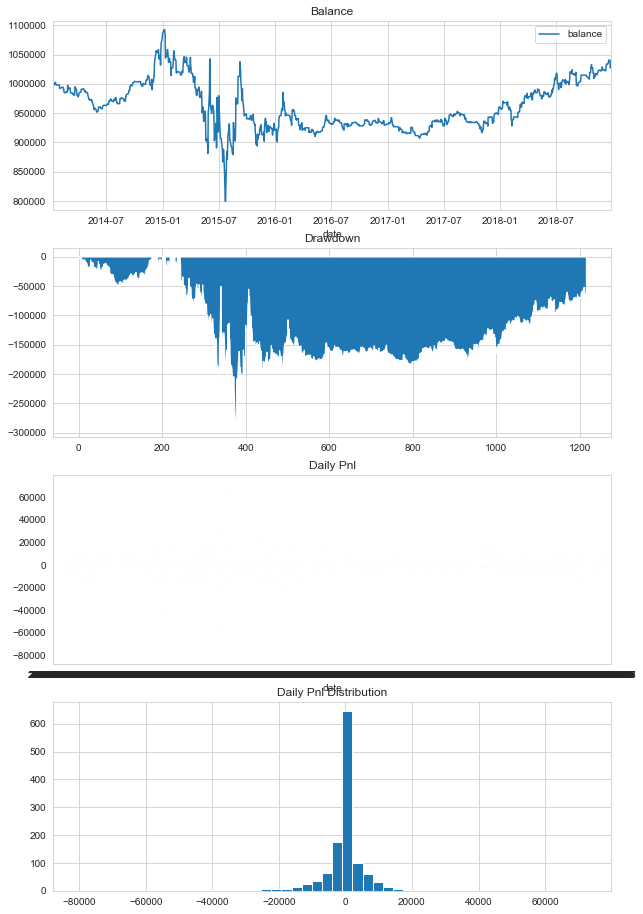

In [6]:
#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [8]:
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("range_wide", 0.1, 0.3, 0.05)

engine.run_optimization(setting)

2019-12-09 23:41:25.371250	参数：{'range_wide': 0.1}, 目标：0.12041565130054581
2019-12-09 23:41:25.372252	参数：{'range_wide': 0.3}, 目标：0.07296428415952719
2019-12-09 23:41:25.372252	参数：{'range_wide': 0.15000000000000002}, 目标：-0.03800226566691579
2019-12-09 23:41:25.372252	参数：{'range_wide': 0.25}, 目标：-0.1296894679240018
2019-12-09 23:41:25.372252	参数：{'range_wide': 0.2}, 目标：-0.2769436677757579


[("{'range_wide': 0.1}",
  0.12041565130054581,
  {'start_date': datetime.date(2014, 1, 9),
   'end_date': datetime.date(2018, 12, 28),
   'total_days': 1215,
   'profit_days': 392,
   'loss_days': 453,
   'capital': 1000000,
   'end_balance': 1077470.1345999998,
   'max_drawdown': -264990.2513999989,
   'max_ddpercent': -20.838049319892722,
   'max_drawdown_duration': 904,
   'total_net_pnl': 77470.13459999976,
   'daily_net_pnl': 63.76142765432079,
   'total_commission': 78349.8654,
   'daily_commission': 64.48548592592593,
   'total_slippage': 156000.0,
   'daily_slippage': 128.39506172839506,
   'total_turnover': 2611662180.0,
   'daily_turnover': 2149516.1975308643,
   'total_trade_count': 2600,
   'daily_trade_count': 2.139917695473251,
   'total_return': 7.747013459999974,
   'annual_return': 1.5302742637036986,
   'daily_return': 0.0062367740064437896,
   'return_std': 0.8023847930109271,
   'sharpe_ratio': 0.12041565130054581,
   'return_drawdown_ratio': 0.37177248892507453}),